In [126]:
import sys
import Green_functions as gr
import numpy as np

%reload_ext autoreload
%autoreload 2
%matplotlib qt

sim = gr.simulation()
sim.GYSRMapCalcSquare(xypx=100,xy=(-40,40),mode=2)
sim.map2Dplot()


1 cycle: 0.001 minutes --- Total time: 7.98 seconds


In [113]:
sim.G0MAPcalcSquare(xypx=100,xy=(-120,120),mode=1)
sim.map2Dplot()

1 cycle: 0.00698089599609375 allcycle: 0.698089599609375


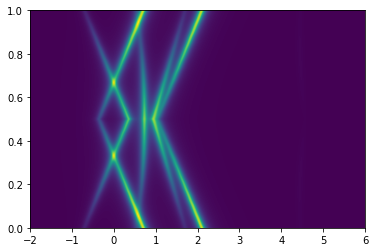

In [129]:
import numpy as np
import matplotlib.pyplot as plt



def P(D,Delta,J,E,T):
    En=Energies(D,Delta,J)
    return np.divide(np.exp(-np.divide(E,T)),np.sum(np.exp(-np.divide(En,T))))
    
def peak(D,Delta,J,x,DeltaE,Gamma,w,T,E0):
    # print(P(D,Delta,J,E0,T)*w,DeltaE)
    return w*P(D,Delta,J,E0,T)*np.divide(Gamma,np.add(np.power(np.add(x,-DeltaE),2),Gamma**2/2))

def Energies(D,Delta,J):
    return [D/4-Delta,D/4+Delta,D/4-7*J/4,D/4+5*J/4,(1/4)*(5*D-J-2*np.sqrt(4*D**2-4*D*J+9*J**2)),(1/4)*(5*D-J+2*np.sqrt(4*D**2-4*D*J+9*J**2))]

def weights(D,Delta,J):
    return [1/2,    1/2,(1/2)*((-2*D+J-np.sqrt(4*D**2-4*D*J+9*J**2))**2/(8*J**2+np.abs(-2*D+J-np.sqrt(4*D**2-4*D*J+9*J**2))**2)),   (1/2)*((2*D-J-np.sqrt(4*D**2-4*D*J+9*J**2))**2)/(8*J**2+np.abs(2*D-J-np.sqrt(4*D**2-4*D*J+9*J**2))**2) ]

## LIST OF ABSOLUTE ENERGIES AND TRANSITION WEIGHTS ##
#  EGSW=D/4-Delta (Sz=+-1/2)
#  EW1=D/4+Delta  (Sz=+-1/2)
#  EGSS=D/4-7*J/4 (Sz=0)
#  ES1=D/4+5*J/4 (Sz=0)
#  ES2=(1/4)*(5*D-J-2*np.sqrt[4D**2-4*D*J+9J**2]) (Sz=+-1)
#  ES3=(1/4)*(5*D-J+2*np.sqrt[4D**2-4*D*J+9J**2]) (Sz=+-1)
#  1/2(2-0)-->1/2(down), w1=1/4 (EGSS-EGSW) and w1*=1/4 (ES1-EGSW)
#  -1/2(2-0)-->-1/2(up), w1=1/4 (EGSS-EGSW) and w1*=1/4 (ES1-EGSW)
#  1/2(2-0)-->1/2(up), w3=(1/2)(2*D-J+np.sqrt(4*D**2-4*D*J+9J**2))**2/(8J**2+J*np.abs(2*D-J+np.sqrt(4*D**2-4*D*J+9J**2))) (ES2-EGSW)
#  w3*=(1/2)(2*D-J-np.sqrt(4*D**2-4*D*J+9J**2))**2/(8J**2+J*np.abs(2*D-J-np.sqrt(4*D**2-4*D*J+9J**2))) (ES3-EGSW)
#  -1/2(2-0)-->1/2(downm) w3 (ES2-EGSW) and w3* (ES3-EGSW)
#  1/2(down)-(-1/2)(up)--> 1/2(2) or (-1/2)(0), w4=1/4 (EGSW-EGSS) and W4*=1/4 (EW1-EGSS)


D=2
Delta=0.7

a=np.linspace(0.2,0.8,100)
b=np.linspace(0.8,0.2,100)
J=np.concatenate((b,a))
x=np.linspace(-2,6,1000)
T=0.3
Gamma=0.1


Y=[]
for i in J:
    E=Energies(D,Delta,i)
    w=weights(D,Delta,i)
    p1=peak(D,Delta,i,x,E[2]-E[0],Gamma,w[0],T,E[0])
    p2=peak(D,Delta,i,x,E[3]-E[0],Gamma,w[1],T,E[0])
    p3=peak(D,Delta,i,x,E[4]-E[0],Gamma,w[2],T,E[0])
    p4=peak(D,Delta,i,x,E[5]-E[0],Gamma,w[3],T,E[0])
    p5=peak(D,Delta,i,x,E[0]-E[2],Gamma,w[0],T,E[2])
    p6=peak(D,Delta,i,x,E[1]-E[2],Gamma,w[1],T,E[2])
    Y.append(p1+p2+p3+p4+p5+p6)
    #pp1=
    #pp2=
    #pp3=
    #pp4=
    #pp5=
    #pp6=
plt.imshow(Y,aspect='auto',extent=(-2,6,0,1))
plt.show()

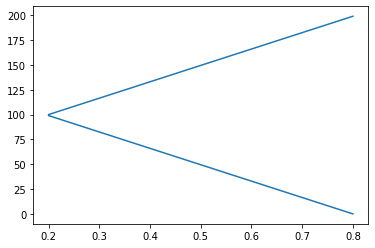

In [130]:
plt.plot(J,np.arange(0,len(J)))

In [190]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib qt

def P(D,Delta,J,E,T): #thermal occupation probability
    En=Energies(D,Delta,J)
    return np.divide(np.exp(-np.divide(E,T)),np.sum(np.exp(-np.divide(En,T))))
    
def peak(D,Delta,J,x,DeltaE,Gamma,w,T,E0): 
    return w*P(D,Delta,J,E0,T)*np.divide(Gamma,np.add(np.power(np.add(x,-DeltaE),2),Gamma**2/2))

def Energies(D,Delta,J):
    return [D/4-Delta,  D/4+Delta,  D/4-7*J/4,  D/4+5*J/4,  (1/4)*(5*D-J-2*np.sqrt(4*D**2-4*D*J+9*J**2)),   (1/4)*(5*D-J+2*np.sqrt(4*D**2-4*D*J+9*J**2))]

def weights(D,Delta,J):
    return [1,  1,  (1/2)*((-2*D+J-np.sqrt(4*D**2-4*D*J+9*J**2))**2/(8*J**2+np.abs(-2*D+J-np.sqrt(4*D**2-4*D*J+9*J**2))**2)+(8*J**2/(8*J**2+np.abs(-2*D+J+np.sqrt(4*D**2-4*D*J+9*J**2))**2))),  (1/2)*((2*D-J-np.sqrt(4*D**2-4*D*J+9*J**2))**2)/(8*J**2+np.abs(2*D-J-np.sqrt(4*D**2-4*D*J+9*J**2))**2)+(8*J**2/(8*J**2+np.abs(-2*D+J-np.sqrt(4*D**2-4*D*J+9*J**2))**2))]

D=0.7
Delta=0.7
Deltat = 0.68


#J from spectrum
a = np.array([0.596899091,0.592263,0.599925,0.592789,0.590584,0.597909,0.634405,0.648816,0.673330,0.72108,0.759739,0.781286,0.782148,0.778115,0.762544,0.745005,0.696710,0.652128,0.616709,0.606191,0.593855,0.590836,0.596292,0.606088,0.609632,])
a = a*1.0312
a = a-Deltat
J = (Delta-a)*4/7



x=np.linspace(-0.5,3,1000)

T=0.03
Gamma=0.06


Y=[]
for i in J:
    E=Energies(D,Delta,i)
    w=weights(D,Delta,i)
    p1=peak(D,Delta,i,x,E[2]-E[0],Gamma,w[0],T,E[0])
    p2=peak(D,Delta,i,x,E[3]-E[0],Gamma,w[1],T,E[0])
    p3=peak(D,Delta,i,x,E[4]-E[0],Gamma,w[2],T,E[0])
    p4=peak(D,Delta,i,x,E[5]-E[0],Gamma,w[3],T,E[0])
    p5=peak(D,Delta,i,x,E[0]-E[2],Gamma,w[0],T,E[2])
    p6=peak(D,Delta,i,x,E[1]-E[2],Gamma,w[1],T,E[2])
    Y.append(p1+p2+p3+p4+p5+p6)


#plotting
fig,ax = plt.subplots(1)

ax.imshow(Y,aspect='auto',extent=(-0.5,3,0,1))

ax.axvline(Delta,linewidth=2,linestyle='--',color='white')

In [199]:


def P(D,Delta,J,E,T): #thermal occupation probability
    En=Energies(D,Delta,J)
    return np.divide(np.exp(-np.divide(E,T)),np.sum(np.exp(-np.divide(En,T))))
    
def peak(D,Delta,J,x,DeltaE,Gamma,w,T,E0): 
    return w*P(D,Delta,J,E0,T)*np.divide(Gamma,np.add(np.power(np.add(x,-DeltaE),2),Gamma**2/2))

def Energies(D,Delta,J):
    return [D/4-Delta,  D/4+Delta,  D/4-7*J/4,  D/4+5*J/4,  (1/4)*(5*D-J-2*np.sqrt(4*D**2-4*D*J+9*J**2)),   (1/4)*(5*D-J+2*np.sqrt(4*D**2-4*D*J+9*J**2))]

def weights(D,Delta,J):
    return [1,  1,  (1/2)*((-2*D+J-np.sqrt(4*D**2-4*D*J+9*J**2))**2/(8*J**2+np.abs(-2*D+J-np.sqrt(4*D**2-4*D*J+9*J**2))**2)+(8*J**2/(8*J**2+np.abs(-2*D+J+np.sqrt(4*D**2-4*D*J+9*J**2))**2))),  (1/2)*((2*D-J-np.sqrt(4*D**2-4*D*J+9*J**2))**2)/(8*J**2+np.abs(2*D-J-np.sqrt(4*D**2-4*D*J+9*J**2))**2)+(8*J**2/(8*J**2+np.abs(-2*D+J-np.sqrt(4*D**2-4*D*J+9*J**2))**2))]

D=0.7
Delta=0.7
Deltat = 0.68


#J from spectrum
# a = np.array([0.596899091,0.592263,0.599925,0.592789,0.590584,0.597909,0.634405,0.648816,0.673330,0.72108,0.759739,0.781286,0.782148,0.778115,0.762544,0.745005,0.696710,0.652128,0.616709,0.606191,0.593855,0.590836,0.596292,0.606088,0.609632,])
# a = a*1.0312
# a = a-Deltat
# J = ((Delta-a)*4/7)*0.1

J = np.zeros(100)+0.4

x=np.linspace(-0.5,3,1000)

T=0.1
Gamma=0.06


Y=[]
for i in J:
    E=Energies(D,Delta,i)
    w=weights(D,Delta,i)
    p1=peak(D,Delta,i,x,E[2]-E[0],Gamma,w[0],T,E[0])
    p2=peak(D,Delta,i,x,E[3]-E[0],Gamma,w[1],T,E[0])
    p3=peak(D,Delta,i,x,E[4]-E[0],Gamma,w[2],T,E[0])
    p4=peak(D,Delta,i,x,E[5]-E[0],Gamma,w[3],T,E[0])
    p5=peak(D,Delta,i,x,E[0]-E[2],Gamma,w[0],T,E[2])
    p6=peak(D,Delta,i,x,E[1]-E[2],Gamma,w[1],T,E[2])
    Y.append(p1+p2+p3+p4+p5+p6)


#plotting
fig,ax = plt.subplots(1)

ax.imshow(Y,aspect='auto',extent=(-0.5,3,0,1))

ax.axvline(Delta,linewidth=2,linestyle='--',color='white')

In [ ]:
# energy levels plot

x = np.linspace(-0.5,3,1000)
J = np.linspace(0.2,0.5,1000)

fig,ax = plt.subplots(1)




In [201]:
Deltat = 0.66
Deltas = 0.7
a = np.array([0.596899091,0.592263,0.599925,0.592789,0.590584,0.597909,0.634405,0.648816,0.673330,0.72108,0.759739,0.781286,0.782148,0.778115,0.762544,0.745005,0.696710,0.652128,0.616709,0.606191,0.593855,0.590836,0.596292,0.606088,0.609632,])
a = a*1.0312
a = a-Deltat
J = (Deltas-a)*4/7


plt.plot(J,np.arange(0,len(J)))

In [203]:
J.max()-J.min()

(0.42913701668571436, 0.3162565613714286)